In [597]:
import numpy
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [598]:
df = pd.read_csv('my_phone.csv')
df.head(10)

,Unnamed: 0,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
0,0,842,NO,188,7,2.0,2549,0,1,20,756,1.0
1,1,1021,YES,136,53,3.0,2631,1,0,905,1988,2.0
2,2,563,YES,145,41,5.0,2603,1,0,1263,1716,2.0
3,3,615,YES,131,10,6.0,2769,0,0,1216,1786,2.0
4,4,1821,YES,141,44,2.0,1411,0,0,1208,1212,1.0
5,5,1859,NO,164,22,1.0,1067,1,0,1004,1654,1.0
6,6,1821,NO,139,10,8.0,3220,0,1,381,1018,3.0
7,7,1954,NO,187,24,4.0,700,1,1,512,1149,0.0
8,8,1445,YES,174,53,7.0,1099,0,0,386,836,0.0
9,9,509,YES,93,9,5.0,513,1,0,1137,1224,0.0


In [599]:
df = df.drop(columns="Unnamed: 0")
#we already have index, no need to duplicate it

In [600]:
df.describe()

,battery_power,weight,memory,n_cores,ram,wifi,pixel_height,pixel_width,price_range
count,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,3020.000000
mean,1127.392289,139.426617,27.362438,3.963930,1715.922637,0.501990,672.843532,1116.360945,1.331126
std,425.790696,33.675572,18.112879,2.220142,1184.300498,0.500058,404.404351,459.694423,0.940227
min,500.000000,80.000000,2.000000,1.000000,6.000000,0.000000,0.000000,240.000000,0.000000
25%,780.750000,111.000000,12.000000,2.000000,652.000000,0.000000,364.750000,739.000000,1.000000
50%,983.000000,139.000000,22.000000,4.000000,1489.500000,1.000000,635.000000,1065.500000,1.000000
75%,1489.000000,168.000000,43.000000,6.000000,2746.000000,1.000000,951.000000,1492.250000,2.000000
max,1999.000000,200.000000,64.000000,8.000000,3998.000000,1.000000,1960.000000,1998.000000,3.000000


In [601]:
df.dtypes
#bluetooth - object ("yes", "no" values), dual_sim - object, even though they are already numerical

battery_power      int64
bluetooth         object
weight             int64
memory             int64
n_cores          float64
ram                int64
dual_sim          object
wifi               int64
pixel_height       int64
pixel_width        int64
price_range      float64
dtype: object

In [602]:
df['bluetooth'].unique()
#2 unique values "yes","no" > ordinal encoding

array(['NO', 'YES'], dtype=object)

In [603]:
bluetooth_replace = {"YES":1, "NO":0}
df["bluetooth"] = df["bluetooth"].replace(bluetooth_replace)

In [604]:
df['dual_sim'].unique()
#3 unique values, "NO" changing to 0 as they mean the same thing

array(['0', '1', 'NO'], dtype=object)

In [605]:
df['dual_sim'] = np.where(df['dual_sim'] == "NO", "0", df['dual_sim'])

In [606]:
#converting dual_sim to int64 type
df['dual_sim'] = df['dual_sim'].infer_objects().astype(np.int64)

In [607]:
df.dtypes

battery_power      int64
bluetooth          int64
weight             int64
memory             int64
n_cores          float64
ram                int64
dual_sim           int64
wifi               int64
pixel_height       int64
pixel_width        int64
price_range      float64
dtype: object

In [608]:
df['n_cores'].unique()
#it is strange that there are values with 3.5 cores ???

array([2. , 3. , 5. , 6. , 1. , 8. , 4. , 7. , 3.5])

In [609]:
df[df['n_cores'] == 3.5]

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
72,605,0,142,9,3.5,392,0,0,160,1026,0.0
76,1114,0,197,9,3.5,907,0,0,1040,1071,0.0
83,1008,0,114,61,3.5,2009,0,0,1077,1122,1.0
87,1083,1,178,64,3.5,3210,1,0,1025,1118,3.0
90,1724,0,177,57,3.5,2822,1,0,1605,1924,3.0
94,1322,0,140,7,3.5,1418,1,0,177,1990,1.0
95,1137,1,196,7,3.5,3616,0,1,942,1179,3.0
110,783,0,106,43,3.5,2016,1,0,1198,1471,1.0


There are several rows with 3.5 n_cores, while a phone should not have half of a core. 
Those rows will be dropped, can't round them up, or replace with a mean. 

In [610]:
df.drop(df.loc[df['n_cores']==3.5].index, inplace=True)

In [611]:
df[df['pixel_height'] == 0]

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
1481,1834,0,99,40,4.0,3692,0,0,0,1987,3.0
1933,897,1,154,2,8.0,1958,0,0,0,994,1.0
2420,986,0,80,26,8.0,1316,0,0,0,1214,NaN
2819,1992,1,153,43,5.0,2179,1,0,0,883,NaN


Pixel_height can not be 0. Checked for similar values in pixel_width and substitute the 4 missing values with corresponding pixel_height or the mean of pixel_heights. 

In [612]:
#replaced with the another value that has the same pixel_width
df['pixel_height'] = np.where((df['pixel_height'] == 0) & (df['pixel_width'] == 1987), 1197, df['pixel_height'])

#replaced with the mean of same values in pixel_width
df['pixel_height'] = np.where((df['pixel_height'] == 0) & (df['pixel_width'] == 994), round((363+841+747)/3), df['pixel_height'])
df['pixel_height'] = np.where((df['pixel_height'] == 0) & (df['pixel_width'] == 883), round((856+620)/2), df['pixel_height'])

#dropped as no same values found in pixel_width
df.drop(df.loc[df['pixel_height']==0].index, inplace=True)

In [613]:
df.describe()

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
count,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,3012.000000
mean,1127.488158,0.374969,139.407878,27.353278,3.963849,1715.358514,0.507355,0.502867,673.196709,1115.845425,1.330677
std,426.027783,0.484175,33.658860,18.098073,2.221621,1184.587268,0.500008,0.500054,403.722944,459.785496,0.939315
min,500.000000,0.000000,80.000000,2.000000,1.000000,6.000000,0.000000,0.000000,1.000000,240.000000,0.000000
25%,780.000000,0.000000,111.000000,12.000000,2.000000,652.000000,0.000000,0.000000,366.000000,739.000000,1.000000
50%,983.000000,0.000000,139.000000,22.000000,4.000000,1489.000000,1.000000,1.000000,635.000000,1064.000000,1.000000
75%,1489.000000,1.000000,168.000000,43.000000,6.000000,2744.500000,1.000000,1.000000,950.500000,1492.500000,2.000000
max,1999.000000,1.000000,200.000000,64.000000,8.000000,3998.000000,1.000000,1.000000,1960.000000,1998.000000,3.000000


After changing 0 values from pixel_height column the minimum became 1. For the SmartPhone Lowest Resolution is (240 x 320) and pixel_width min is 240 in our df. 

In [614]:
df[df['pixel_height'] < 320]

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
0,842,0,188,7,2.0,2549,0,1,20,756,1.0
10,769,1,182,9,5.0,3946,1,0,248,874,3.0
11,1520,1,177,33,8.0,3826,0,1,151,1005,3.0
24,503,0,111,8,3.0,2583,1,0,201,1245,1.0
25,961,1,114,57,8.0,2782,1,1,291,1434,2.0
...,...,...,...,...,...,...,...,...,...,...,...
2990,1807,0,162,37,1.0,2741,0,1,246,932,NaN
2991,1797,1,174,42,3.0,3359,0,1,57,1169,NaN
2994,936,1,139,46,2.0,684,1,1,265,886,NaN
2998,1533,1,171,50,2.0,2509,1,0,38,832,NaN


We have almost 1/4 of our data with pixel_height < 320. It is concerning >> yes, in reality would double check with the source of data how they plan to produce such small phones? 

In [615]:
#create separate df for our phones under phone_df
phone_df = df.loc[2000:2999]
phone_df[phone_df['pixel_height'] < 320]

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
2000,1043,1,193,5,3.0,3476,1,0,226,1412,NaN
2003,1546,0,96,25,8.0,3893,1,0,295,1752,NaN
2009,1520,0,171,25,3.0,651,0,1,52,1009,NaN
2011,1343,0,171,34,3.0,3911,0,1,235,1671,NaN
2013,1190,1,158,19,5.0,992,1,0,227,1856,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2988,1653,1,99,49,7.0,377,0,0,206,936,NaN
2990,1807,0,162,37,1.0,2741,0,1,246,932,NaN
2991,1797,1,174,42,3.0,3359,0,1,57,1169,NaN
2994,936,1,139,46,2.0,684,1,1,265,886,NaN


Some of the rows for "our" phones also have pixel_height below 320. So I assume it is for study purposes(similar to RAM) and will not drop them. Maybe the company specialized on making small phones. Nevertheless, it seems very unlikely anyone would make a phone less then 1cm high, so will drop rows in both df and phone_df that have pixel_height below 38(approximate to 1cm) 

In [616]:
df.drop(df.loc[df['pixel_height']<38].index, inplace=True)
phone_df = df.loc[2000:2999]

In [617]:
df.describe()

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
count,3931.000000,3931.000000,3931.000000,3931.000000,3931.000000,3931.000000,3931.000000,3931.000000,3931.000000,3931.000000,2967.000000
mean,1126.585856,0.371916,139.484101,27.201475,3.956500,1705.310354,0.506487,0.503434,686.534215,1117.116255,1.330300
std,426.170437,0.483378,33.659626,18.048242,2.217072,1182.632234,0.500022,0.500052,396.719832,460.422304,0.936325
min,500.000000,0.000000,80.000000,2.000000,1.000000,6.000000,0.000000,0.000000,38.000000,240.000000,0.000000
25%,780.000000,0.000000,111.000000,12.000000,2.000000,648.000000,0.000000,0.000000,384.000000,739.000000,1.000000
50%,975.000000,0.000000,139.000000,21.000000,4.000000,1470.000000,1.000000,1.000000,647.000000,1067.000000,1.000000
75%,1489.500000,1.000000,168.000000,42.000000,6.000000,2734.000000,1.000000,1.000000,955.500000,1495.500000,2.000000
max,1998.000000,1.000000,200.000000,64.000000,8.000000,3998.000000,1.000000,1.000000,1960.000000,1998.000000,3.000000


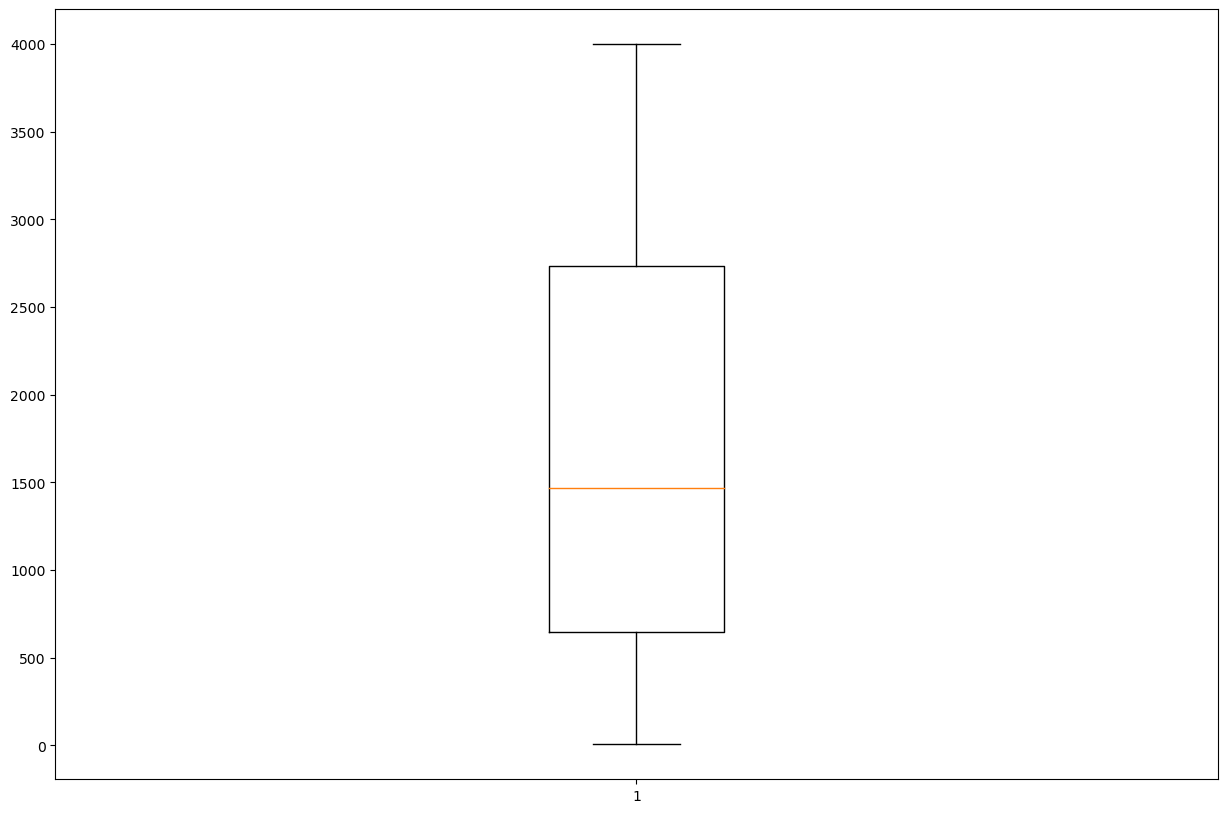

In [618]:
#checking distribution of data in 'ram' column because min is 6 and max is 3998
data = df['ram']
fig = plt.figure(figsize =(15, 10))
plt.boxplot(data)
plt.show()

In [619]:
df[df['ram'] > 2700].count()

battery_power    1003
bluetooth        1003
weight           1003
memory           1003
n_cores          1003
ram              1003
dual_sim         1003
wifi             1003
pixel_height     1003
pixel_width      1003
price_range       651
dtype: int64

In [620]:
df[df['ram'] < 700].count()

battery_power    1078
bluetooth        1078
weight           1078
memory           1078
n_cores          1078
ram              1078
dual_sim         1078
wifi             1078
pixel_height     1078
pixel_width      1078
price_range       956
dtype: int64

The distribution seems to be more or less balanced and gradual. There are quiet a lot of values below 25th and above 75th percentiles. 

In [621]:
df.isnull().values.any()

True

In [622]:
df['price_range'].isna().sum()

964

In count we have 2967 values in price_range and 3931 values in all other columns. All NaN seem to be in price_range 964+2967 = 3931, and those NaN are for the price_range we are supposed to predict. Remove phone_df data from df.

In [623]:
df.drop(df.loc[2000:2999].index, inplace=True)

In [624]:
df.describe()

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
count,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000
mean,1086.427368,0.324907,139.441523,25.130772,3.840580,1564.372767,0.504213,0.501517,698.195484,1075.019548,1.330300
std,416.235109,0.468419,33.251233,17.519080,2.183552,1178.652732,0.500067,0.500082,386.876163,459.419527,0.936325
min,501.000000,0.000000,80.000000,2.000000,1.000000,6.000000,0.000000,0.000000,38.000000,240.000000,0.000000
25%,774.500000,0.000000,111.000000,11.000000,2.000000,575.000000,0.000000,0.000000,404.000000,711.000000,1.000000
50%,842.000000,0.000000,139.000000,17.000000,4.000000,1167.000000,1.000000,1.000000,666.000000,1022.000000,1.000000
75%,1430.000000,1.000000,167.000000,40.000000,5.000000,2548.500000,1.000000,1.000000,961.000000,1429.000000,2.000000
max,1998.000000,1.000000,200.000000,64.000000,8.000000,3998.000000,1.000000,1.000000,1960.000000,1998.000000,3.000000


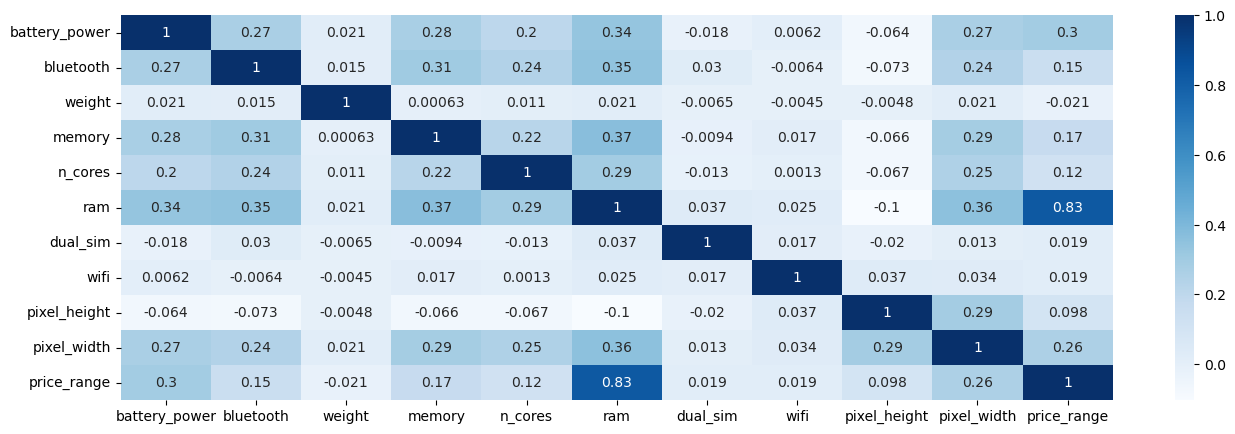

In [625]:
import seaborn as sns
cor_coef = df.corr()
plt.figure(figsize = (16,5))
ax = sns.heatmap(cor_coef, annot=True, cmap = 'Blues')

In [626]:
df.corr()['price_range'].sort_values()

weight          -0.020507
dual_sim         0.018629
wifi             0.019091
pixel_height     0.097521
n_cores          0.118112
bluetooth        0.149586
memory           0.170737
pixel_width      0.262727
battery_power    0.296895
ram              0.826744
price_range      1.000000
Name: price_range, dtype: float64

In [627]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2967 entries, 1 to 4019
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2967 non-null   int64  
 1   bluetooth      2967 non-null   int64  
 2   weight         2967 non-null   int64  
 3   memory         2967 non-null   int64  
 4   n_cores        2967 non-null   float64
 5   ram            2967 non-null   int64  
 6   dual_sim       2967 non-null   int64  
 7   wifi           2967 non-null   int64  
 8   pixel_height   2967 non-null   int64  
 9   pixel_width    2967 non-null   int64  
 10  price_range    2967 non-null   float64
dtypes: float64(2), int64(9)
memory usage: 278.2 KB


 Linear regression.
 To start with I will feed the whole df to see what results we get

In [628]:
X = df.drop(columns = ['price_range'])
Y = df['price_range']

In [629]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 20)

In [630]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

In [631]:
linear_regression.fit(X_train, Y_train)

LinearRegression()

In [632]:
linear_regression.predict(X_test)
pred = linear_regression.predict(X_test)

In [633]:
# Explained variance score: 1 is perfect prediction
print('Variance score: ', linear_regression.score(X, Y))

Variance score:  0.7692951615381614


In [634]:
print(pred.round(2))

[ 1.21  0.62  2.05  0.47  0.8   0.46  0.44  2.72  3.32  0.94  0.97  2.17
  1.22  1.13  3.03  0.64  1.88  1.45  0.81  1.14  0.66  0.48  1.08  0.81
  0.79  1.61  1.59  1.43  1.66  1.24  1.48  0.81  0.88  2.13  0.66  0.71
  2.42  1.73  0.41  0.76  0.73  2.16  2.28  2.59  2.35  0.92  2.16  1.69
  2.75  0.92  0.52  1.33  0.3   0.61  2.51  2.64  0.79  2.52  2.93  0.95
  2.04  0.72  0.53  2.23  2.06 -0.03  2.22  1.03  1.8   1.76  0.95  1.48
  3.08  0.62  0.73  3.06  2.97  0.52  1.1   2.88  2.35  2.6   0.32  0.88
  0.7   1.92  3.14  3.08  1.11  1.    0.86  1.78  0.48  1.77  2.86  1.81
  2.73  1.7   0.33  0.51  3.04  0.5   0.94  1.83  1.54  0.73  2.14  2.08
  1.54  0.69  1.3   3.23  2.35  0.7   1.25  2.27  1.57  2.54  0.19  0.03
  2.44  0.    2.69  0.54  0.86  2.89  1.83  1.31  0.95  0.37  2.41  1.93
  0.49  1.12  0.59  3.15  0.55  1.69  2.95  1.16  1.34  3.    0.74  1.22
  0.42  2.67  0.47  0.3   1.33  2.3   1.57  0.53  1.51  1.21  0.56  0.56
  2.11  2.78  0.27  3.01  1.01  0.9   0.76  1.    0

The prediction is not with whole numbers, but a lot of decimals and even negative, while price can not be negative

Lets try to feed the next model only those columns that we know have good correlation with price_range: ram, battery_power, pixel_width

In [635]:
X = df[['ram', 'battery_power', 'pixel_width']]
Y = df['price_range']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 20)
linear_regression = LinearRegression()
linear_regression.fit(X_train, Y_train)

LinearRegression()

In [636]:
linear_regression.predict(X_test)
pred = linear_regression.predict(X_test)

In [637]:
# Explained variance score: 1 is perfect prediction
print('Variance score: ', linear_regression.score(X, Y))

Variance score:  0.6854530248292795


In [638]:
print(pred.round(2))

[0.92 0.64 2.32 0.62 0.54 0.47 0.56 2.85 2.69 0.7  0.84 2.54 1.84 0.75
 2.63 0.71 1.59 1.47 1.1  0.91 0.71 0.44 0.8  1.15 1.01 1.97 1.61 1.45
 1.82 0.79 1.38 0.73 0.67 1.99 0.57 0.39 2.14 1.82 0.8  0.49 0.44 2.51
 1.89 2.47 2.48 0.76 2.64 1.76 2.82 0.58 0.49 0.82 0.34 0.48 2.89 2.76
 0.78 2.41 2.3  0.87 1.86 0.89 0.96 2.66 1.72 0.46 2.34 1.26 1.51 2.03
 0.97 1.62 2.68 0.82 1.21 2.5  2.63 0.82 0.76 2.3  2.09 2.5  0.87 0.72
 0.69 2.34 2.65 2.95 0.75 0.87 1.38 1.68 0.61 1.52 2.82 1.67 2.24 2.
 0.85 1.15 2.78 0.59 0.75 1.97 1.03 0.53 1.99 2.16 1.79 0.94 0.91 2.82
 2.37 1.15 1.47 1.8  1.56 2.86 0.51 0.58 2.58 0.73 2.3  1.04 0.75 2.64
 2.14 1.01 0.68 1.07 2.51 2.38 0.33 1.62 0.49 2.97 0.67 1.82 2.75 0.96
 0.89 2.77 0.58 0.89 0.45 2.24 0.75 0.46 1.46 2.7  1.54 0.34 1.64 1.26
 0.56 0.6  2.3  2.82 0.92 2.56 0.71 1.39 1.02 0.98 0.45 0.48 1.02 1.72
 0.88 0.66 2.84 1.82 0.88 0.67 2.6  1.16 2.16 1.82 0.39 2.06 1.91 2.75
 0.62 0.82 2.03 0.52 1.05 0.75 2.77 1.32 1.97 1.94 1.95 0.48 2.76 0.58
 0.72 2.

Even though the accuracy is lower, there are no negative values for prices, which is an improvement in itself.

In [639]:
X = df[['ram', 'battery_power', 'pixel_width', 'memory']]
Y = df['price_range']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 20)
linear_regression = LinearRegression()
linear_regression.fit(X_train, Y_train)

LinearRegression()

In [640]:
linear_regression.predict(X_test)
pred = linear_regression.predict(X_test)

In [641]:
# Explained variance score: 1 is perfect prediction
print('Variance score: ', linear_regression.score(X, Y))

Variance score:  0.7071588471505079


In [642]:
print(pred.round(2))

[0.97 0.68 2.21 0.71 0.57 0.52 0.38 2.93 2.99 0.8  0.9  2.4  1.57 0.82
 2.64 0.49 1.74 1.31 0.89 1.03 0.75 0.52 0.85 1.06 1.2  1.87 1.72 1.51
 1.96 0.9  1.28 0.79 0.66 2.   0.63 0.45 2.22 1.93 0.76 0.49 0.49 2.48
 2.09 2.31 2.56 0.8  2.63 1.52 2.77 0.6  0.51 1.06 0.35 0.55 2.71 2.7
 0.79 2.16 2.12 0.92 1.91 0.85 1.06 2.4  1.74 0.24 2.12 1.33 1.45 1.96
 1.02 1.67 2.54 0.61 1.21 2.66 2.71 0.68 0.81 2.56 2.02 2.36 0.51 0.76
 0.76 2.11 2.88 2.9  0.79 0.91 1.36 1.61 0.49 1.58 2.97 1.4  2.41 2.12
 0.51 0.86 2.75 0.42 0.81 2.09 0.91 0.62 1.86 2.32 1.55 1.07 0.98 2.99
 2.4  0.94 1.51 1.92 1.59 2.72 0.39 0.51 2.58 0.47 2.18 1.27 0.77 2.44
 2.01 1.07 0.71 0.85 2.65 2.24 0.36 1.63 0.55 3.13 0.78 1.82 2.99 1.01
 0.98 3.03 0.69 0.97 0.49 2.43 0.54 0.56 1.22 2.6  1.78 0.35 1.51 1.01
 0.61 0.66 2.13 2.72 0.71 2.85 0.76 1.34 0.85 1.02 0.53 0.48 1.07 1.6
 0.91 0.71 2.88 1.98 0.98 0.35 2.59 1.34 2.38 1.74 0.37 1.86 1.79 2.64
 0.67 0.83 1.84 0.53 1.13 0.93 2.88 1.43 1.85 1.6  1.72 0.52 2.67 0.58
 0.77 2.

Tried adding 'memory' column and the prediction got a bit more accurate, while adding 'bluetooth' has created negative values in the prediction.
The biggest problem though remains in that the model does not really predict a category of price_range(even though it is numeric in df), but rather a concrete number that the model calculated out of all the parts we feed it. I would think classification model would be better here as it determines category, instead of numeric value as it is. 

Can still try to predict prices for our phones, just for the sake of having it (with the last trained model)

In [643]:
our_pred = phone_df[['ram', 'battery_power', 'pixel_width', 'memory']]
pred = linear_regression.predict(our_pred)

In [644]:
testing = phone_df
testing['price_range'] = pred.round()
testing

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
2000,1043,1,193,5,3.0,3476,1,0,226,1412,3.0
2001,841,1,191,61,5.0,3895,1,0,746,857,3.0
2002,1807,1,186,27,3.0,2396,0,1,1270,1366,2.0
2003,1546,0,96,25,8.0,3893,1,0,295,1752,3.0
2004,1434,0,108,49,6.0,1773,0,1,749,810,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2995,1700,1,170,54,7.0,2121,0,0,644,913,2.0
2996,609,0,186,13,4.0,1933,1,1,1152,1632,2.0
2997,1185,0,80,8,1.0,1223,0,0,477,825,1.0
2998,1533,1,171,50,2.0,2509,1,0,38,832,2.0


Classification model. Will again start with feeding the whole df to the model to check the results

In [645]:
X = df.drop(columns = ['price_range'])
Y = df['price_range']

from sklearn.linear_model import LogisticRegression
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)
classifier = LogisticRegression(random_state = 20, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=20)

In [646]:
pred = classifier.predict(X_test)

In [647]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(Y_test, pred))

Accuracy :  0.6835016835016835


In [648]:
pred

array([1., 1., 2., 0., 1., 1., 0., 3., 3., 1., 1., 3., 2., 1., 3., 1., 3.,
       1., 1., 1., 1., 1., 1., 0., 1., 2., 1., 1., 3., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 2., 2., 3., 2., 1., 2., 2., 2., 1., 1.,
       1., 1., 1., 3., 3., 1., 3., 3., 1., 1., 0., 0., 3., 3., 0., 2., 1.,
       1., 2., 1., 1., 3., 1., 1., 3., 3., 1., 1., 3., 2., 3., 1., 1., 1.,
       3., 3., 3., 1., 1., 1., 2., 1., 1., 2., 2., 3., 1., 0., 0., 3., 1.,
       1., 1., 1., 1., 1., 2., 1., 1., 1., 3., 2., 1., 1., 1., 2., 3., 0.,
       0., 3., 0., 3., 0., 1., 3., 2., 1., 1., 0., 3., 2., 1., 1., 1., 3.,
       0., 2., 2., 1., 1., 3., 1., 1., 1., 3., 1., 1., 1., 2., 1., 1., 2.,
       1., 1., 1., 3., 3., 0., 3., 1., 0., 0., 1., 1., 1., 0., 2., 1., 1.,
       3., 2., 1., 0., 3., 1., 3., 1., 1., 2., 0., 2., 1., 1., 3., 1., 0.,
       0., 3., 1., 1., 2., 3., 1., 3., 1., 1., 1., 3., 2., 1., 3., 0., 0.,
       1., 1., 1., 0., 3., 2., 0., 0., 1., 1., 1., 2., 1., 1., 0., 2., 0.,
       2., 1., 2., 1., 2.

This time the prediction is actually a whole number that corresponds to the category of price_range. Will try to select those columns that have correlation with price_range (as tried before). High chance that by feeding the whole df we risk having multicollinearity.

In [649]:
X = df[['ram', 'battery_power', 'pixel_width']]
Y = df['price_range']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)
classifier = LogisticRegression(random_state = 20, solver='lbfgs', multi_class='auto')

In [650]:
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=20)

In [651]:
pred = classifier.predict(X_test)

In [652]:
print ("Accuracy : ", accuracy_score(Y_test, pred))

Accuracy :  0.7222222222222222


Tried also adding 'memory' to X, but the accuracy dropped to 60%, may be because 'memory' is correlating with 'ram', 'battery power' and 'pixel_width', so we avoided some multicollinearity by removing it, and only keeping the later 3 with relatively good accuracy. 

In [653]:
X = df[['memory', 'dual_sim', 'weight']]
Y = df['price_range']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)
classifier = LogisticRegression(random_state = 20, solver='lbfgs', multi_class='auto')

In [654]:
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=20)

In [655]:
pred = classifier.predict(X_test)

In [656]:
print ("Accuracy : ", accuracy_score(Y_test, pred))

Accuracy :  0.4983164983164983


As an experiment, tried not feeding 'ram' column to the model, the accuracy has dropped significantly. So far the best result was from feeding those data that correlates the most with 'price_range': 'ram', 'battery power' and 'pixel_width', as well as not adding other relatively high collelating columns that correlate with each other. So will feed our phone_df to the 72% success rate model

In [657]:
X = df[['ram', 'battery_power', 'pixel_width']]
Y = df['price_range']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)
classifier = LogisticRegression(random_state = 20, solver='lbfgs', multi_class='auto')

In [658]:
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=20)

In [659]:
our_pred = phone_df[['ram', 'battery_power', 'pixel_width']]
pred = classifier.predict(our_pred)

In [660]:
phone_df_copy = phone_df.drop(columns = ['price_range'], axis=1)

In [661]:
phone_df_copy['price_range_predicted'] = pred.tolist()

In [662]:
phone_df_copy

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range_predicted
2000,1043,1,193,5,3.0,3476,1,0,226,1412,3.0
2001,841,1,191,61,5.0,3895,1,0,746,857,3.0
2002,1807,1,186,27,3.0,2396,0,1,1270,1366,2.0
2003,1546,0,96,25,8.0,3893,1,0,295,1752,3.0
2004,1434,0,108,49,6.0,1773,0,1,749,810,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2995,1700,1,170,54,7.0,2121,0,0,644,913,2.0
2996,609,0,186,13,4.0,1933,1,1,1152,1632,1.0
2997,1185,0,80,8,1.0,1223,0,0,477,825,1.0
2998,1533,1,171,50,2.0,2509,1,0,38,832,3.0


Clusterization, will start again with feeding it all, K set as 4 because we have 4 categories of price_range

In [663]:
X = df.drop(columns = ['price_range'])
Y = df['price_range']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 20)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train)

KMeans(n_clusters=4)

In [664]:
from sklearn.metrics import accuracy_score 

pred = kmeans.predict(X_test)
print(accuracy_score(pred, Y_test)*100)

36.734693877551024


It is interesting that by running above model several times, it gives completely different % of accuracy. from 2% to 60%. Will try to manually select data next

In [665]:
X = df[['ram', 'battery_power', 'pixel_width', 'memory']]
Y = df['price_range']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 20)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)

KMeans(n_clusters=3)

In [666]:
pred = kmeans.predict(X_test)
print(accuracy_score(pred, Y_test)*100)

44.48979591836735


In [667]:
import warnings
warnings.filterwarnings('ignore')

sse = [] # sum of squared errors
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)

In [668]:
cluster_df = pd.DataFrame({'Cluster':range(1,25), 'sse':sse})
cluster_df.head()

,Cluster,sse
0,1,3.446728e+09
1,2,1.229074e+09
2,3,8.880196e+08
3,4,7.345998e+08
4,5,6.580364e+08


Text(0, 0.5, 'Squared error')

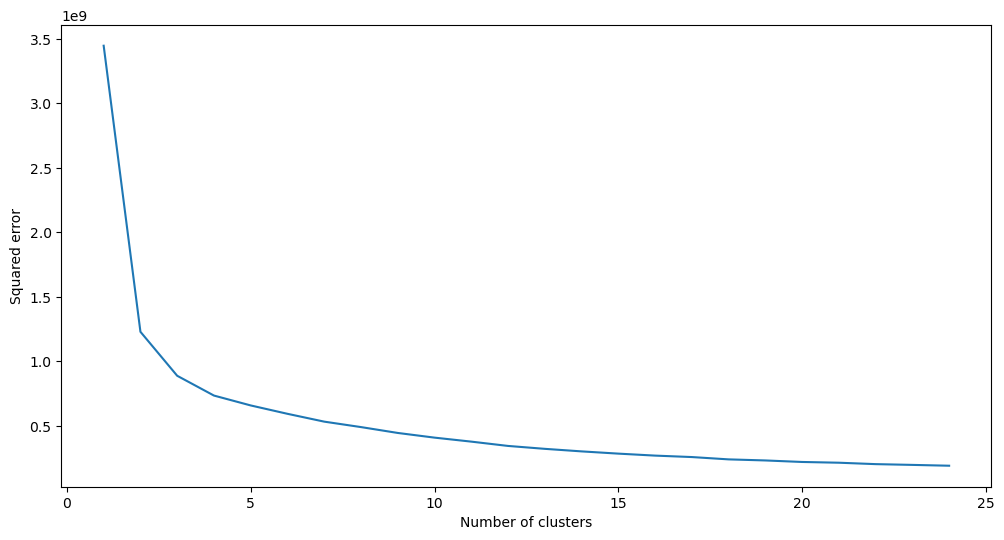

In [669]:
plt.figure(figsize=(12,6))
plt.plot(cluster_df['Cluster'], cluster_df['sse'])
plt.xlabel('Number of clusters')
plt.ylabel('Squared error')

It seems that k of 3 or 4 is the optimal case here according to the elbow method. 
The best results for me were with K=3 and selecting columns 'ram', 'battery_power', 'pixel_width', 'memory'. If in other cases the model was varying a lot between 2-50%, with K=3 and above mentioned columns, almost every time the model hit > 40% accuracy. The prediction accuracy droped every time 'ram' was not used in model, also dropped when K=4 or higher was selected. So proceeding with K=3 and same columns that have high correlation with price_range.

In [670]:
our_pred = phone_df[['ram', 'battery_power', 'pixel_width', 'memory']]
pred = kmeans.predict(our_pred)

In [671]:
phone_df_copy2 = phone_df.drop(columns = ['price_range'], axis=1)

In [672]:
phone_df_copy2['cluster_suggested'] = pred.tolist()
phone_df_copy2['cluster_suggested'] = phone_df_copy2['cluster_suggested'].astype(float)

In [673]:
phone_df_copy2

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,cluster_suggested
2000,1043,1,193,5,3.0,3476,1,0,226,1412,5.0
2001,841,1,191,61,5.0,3895,1,0,746,857,21.0
2002,1807,1,186,27,3.0,2396,0,1,1270,1366,15.0
2003,1546,0,96,25,8.0,3893,1,0,295,1752,13.0
2004,1434,0,108,49,6.0,1773,0,1,749,810,9.0
...,...,...,...,...,...,...,...,...,...,...,...
2995,1700,1,170,54,7.0,2121,0,0,644,913,6.0
2996,609,0,186,13,4.0,1933,1,1,1152,1632,2.0
2997,1185,0,80,8,1.0,1223,0,0,477,825,1.0
2998,1533,1,171,50,2.0,2509,1,0,38,832,6.0
